# Trabajo Semanal N°4 bis
<img src="logo_UTN.svg" title="Logo UTN" align="right" width="150"> 

## Teoría de Circuitos II
### Alumno: Federico Albero
### Curso: R4001

#### Enunciado:
<img src="enunciado_TS4bis.png" title="Consigna" align="left" width="700"> 

#### Resolución analítica incisos a), b), c), y d):

#### LPF-Butterworth_orden-3_ripple_3dB

<IPython.core.display.Math object>

#### LPF-Butterworth_orden-3_ripple_3dB

<IPython.core.display.Math object>

Singularidades LPF Butterwoth
Polos: [-0.5+0.8660254j -1. -0.j        -0.5-0.8660254j]
Ceros: []
Singularidades BPF Butterworth
Polos: [-0.13414404+1.20766417j -0.13414404-1.20766417j -0.225     +0.97435876j
 -0.225     -0.97435876j -0.09085596+0.81795274j -0.09085596-0.81795274j]
Ceros: [0. 0. 0.]


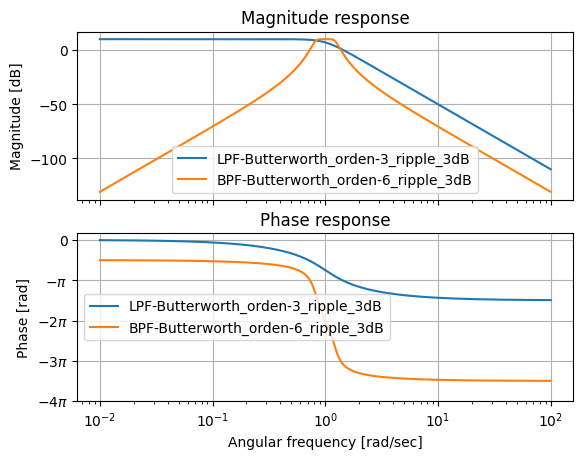

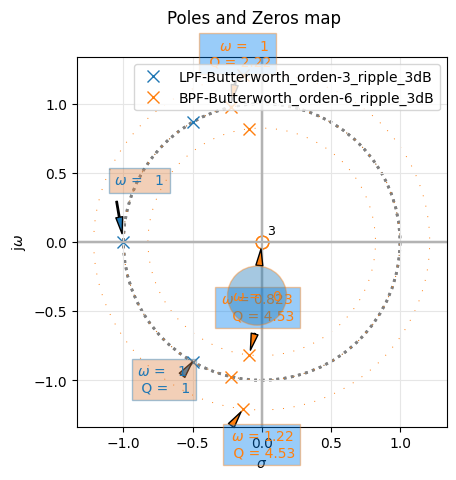

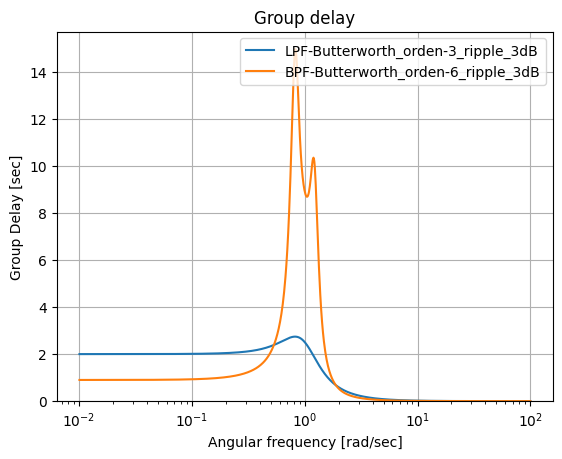

In [1]:
#%% Trabajo Práctico semanal 4 - Bis %%#

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 31 15:09:56 2023

@author: fede23
"""

# Modulos:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# esto dejarlo así, no tocar, es para graficar
all_sys = []
filter_names = []

#%% Valores de la plantilla de diseño y parametros %%#

# Valores plantilla de diseño Filtro Pasa Banda (objetivo):
alpha_max = 3
alpha_min = 20
wo = 1 # frecuencia central banda de paso (normalizada)
wp1 = 0.8
wp2 = 1.25
ws1 = 0.625
ws2 = 1.6

# Valores plantilla de diseño Filtro Pasa Bajos (prototipo):
omega_p = 1
omega_s = 13/6

# Ganancia en la banda de paso:
k_db = 10

#%% Desarrollo %%#

bw = wp2 - wp1
q = wo/bw
ee = (10**(alpha_max/10) - 1) # epsilon²
e = np.sqrt(ee) # epsilon
n = 3
alpha_min_n3 = 10*(np.log10(1 + (ee)*(omega_s**(2*n))))

k_veces = 10**(k_db/20)

#%% Transferencia LPF Butterworth %%#

# obtengo ceros, polos y ganancia de un Butter de orden n
z1,p1,k1 = sig.buttap(n) 
# obtengo num y denum correspondiente a los z,p,k anteriores
num1, den1 = sig.zpk2tf(z1,p1,k1)

# le asigno ganancia a la banda de paso:
num1 = num1*k_veces

# transferencia del LPF Butter
tf1 = sig.TransferFunction( num1, den1 )
all_sys.append(tf1)
label1 = 'LPF-Butterworth' + '_orden-' + str(n) + '_ripple_' + str(alpha_max) + 'dB' # etiqueta
print_subtitle(label1)
# factorizamos en SOS's
sos1 = tf2sos_analog(num1, den1)
pretty_print_SOS(sos1, mode='omegayq')
filter_names.append(label1)

#%% Transferencia BPF Butterworth %%#

# Función a utilizar: scipy.signal.lp2bp(b, a, wo=1.0, bw=1.0)
num2, den2 = sig.lp2bp(num1, den1, wo, bw)
# Obtengo z,p,k de la transferencia en MP finalmente
z2,p2,k2 = sig.tf2zpk(num2, den2)
# transferencia HPF Maxima Planicidad
tf2 = sig.TransferFunction( num2, den2 ) # Función transferencia
all_sys.append(tf2)
label2 = 'BPF-Butterworth' + '_orden-' + str(2*n) + '_ripple_' + str(alpha_max) + 'dB' # etiqueta
print_subtitle(label1)
# factorizamos en SOS's
sos2 = tf2sos_analog(num2, den2)
pretty_print_SOS(sos2, mode='omegayq')
filter_names.append(label2)

#%% Singularidades %%#

#print(f'denominador etapa 1: S² + {-2*p_real1}*S + {w0_etapa1**2}')
print('Singularidades LPF Butterwoth')
print(f'Polos: {p1}')
print(f'Ceros: {z1}')

print('Singularidades BPF Butterworth')
print(f'Polos: {p2}')
print(f'Ceros: {z2}')

plt.close('all') # cierro todo antes de graficar nuevamente por las dudas
analyze_sys( all_sys, filter_names)


#### Inciso e): Simulaciones

<p style="text-align: center;">Simulación numérica</p>